#Bài toán: Phát hiện lửa

*   Input: Hình ảnh có lửa (gồm hình chụp đám cháy, lửa trại, bếp lửa,...)
*   Output: Vị trí phát hiện lửa trong hình ảnh.
*   Ngữ cảnh ứng dụng: Giúp phát hiện sớm nguy cơ cháy nổ.

Mô tả bộ dữ liệu:

*   Bộ dữ liệu có 753 hình ảnh. Một nửa được lấy từ bộ dữ liệu có sẵn, phần còn lại được crawl từ google và dán nhãn thủ công bằng CVAT.
*   Chia train/val: 70/30

Mô tả thuật toán:

*   Huấn luyện và đánh giá mô hình YOLOv8 trên bộ dữ liệu đã thu thập được.

Tham khảo:

*   https://yolov8.com/
*   https://docs.ultralytics.com/
*   https://www.youtube.com/watch?v=Mpsdby8zCTY
*   https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8
*   https://github.com/AndreyGermanov/yolov8_pytorch_python



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Chuẩn bị data

In [ ]:
import os
import shutil
import random

In [ ]:
train_path_imgs = "/content/data/images/train"
val_path_imgs = "/content/data/images/val"

train_path_labels = "/content/data/labels/train"
val_path_labels = "/content/data/labels/val"

In [ ]:
os.makedirs(train_path_imgs, exist_ok = True)
os.makedirs(train_path_labels, exist_ok = True)
os.makedirs(val_path_imgs, exist_ok = True)
os.makedirs(val_path_labels, exist_ok = True)

In [ ]:
# Chia dữ liệu thành train(70%) train val(30%)

imgs_path = '/content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/yolo_dataset_fire_detection/images'
labels_path = '/content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/yolo_dataset_fire_detection/labels'

files = list(set([name[:-4] for name in os.listdir(imgs_path)]))

# Sắp xếp ngẫu nhiên list file names
random.seed(42)
random.shuffle(files)


val_size = int(len(files) * 0.3)
train_size = len(files) - val_size

# copy data to train folder
for filex in files[:val_size]:
      # copy img
      shutil.copy2(imgs_path + '/' + filex + '.jpg',f"{train_path_imgs}/" + filex + '.jpg' )
      # copy label file
      shutil.copy2(labels_path + '/' + filex + '.txt', f"{train_path_labels}/" + filex + '.txt')

# copy data to val folder
for filex in files[train_size:]:
      # copy img
      shutil.copy2(imgs_path + '/' + filex + '.jpg',f"{val_path_imgs}/" + filex + '.jpg' )
      # copy label file
      shutil.copy2(labels_path + '/' + filex + '.txt', f"{val_path_labels}/" + filex + '.txt')

In [ ]:
# tạo file .yaml mô tả dữ liệu

!rm /content/data/mydata.yaml
!echo 'train: ./images/train' >> /content/data/mydata.yaml
!echo 'val: ./images/val' >> /content/data/mydata.yaml
!echo 'nc: 1' >> /content/data/mydata.yaml
!echo "names: ['fire']" >> /content/data/mydata.yaml

In [ ]:
# zip dataset
shutil.make_archive('yolo_fire_dectection_train_data', 'zip', '/content/data')

'/content/yolo_fire_dectection_train_data.zip'

In [ ]:
# lưu file zip vào drive
src = '/content/yolo_fire_dectection_train_data.zip'
dst = '/content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an'
shutil.copy(src, dst)

'/content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/yolo_fire_dectection_train_data.zip'

##Install YOLOv8

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.8/699.8 kB 7.2 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

##Train

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 209MB/s]


In [ ]:
train_epoch = 200
train_patience = 25
save_folder = '/content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/training_result'
save_name = f"YOLOv8_fire_detection_epoch({str(train_epoch)})_patience({str(train_patience)})"

model.train(
    data='/content/data/mydata.yaml',
    imgsz=640,
    epochs=train_epoch,
    patience=train_patience,
    project=save_folder,
    name=save_name,
)

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data/mydata.yaml, epochs=200, time=None, patience=25, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/training_result, name=YOLOv8_fire_detection_epoch(200)_patience(25), exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

100%|██████████| 755k/755k [00:00<00:00, 26.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 104MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/data/labels/train... 225 images, 5 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<00:00, 1508.87it/s]

train: New cache created: /content/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/labels/val... 225 images, 2 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<00:00, 733.53it/s] 

val: WARNING ⚠️ /content/data/images/val/000123.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/images/val/17.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/images/val/191.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/images/val/305.jpg: corrupt JPEG restored and saved
val: New cache created: /content/data/labels/val.cache


Plotting labels to /content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/training_result/YOLOv8_fire_detection_epoch(200)_patience(25)/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200       7.1G      1.918      3.246      1.964          1        640: 100%|██████████| 15/15 [00:11<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all        225        430        0.2      0.145      0.112     0.0366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      7.29G      1.848      2.892      1.917          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]


                   all        225        430     0.0309      0.174     0.0178     0.0062

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      7.35G       1.87      2.374      1.877          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        225        430      0.051      0.336     0.0357    0.00972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      7.35G      2.156       2.48      2.173          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        225        430    0.00267      0.153    0.00171    0.00052



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       7.3G      2.038      2.464      2.076          3        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        225        430    0.00511       0.27    0.00257   0.000596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      7.31G      2.064      2.407      2.005          3        640: 100%|██████████| 15/15 [00:08<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        225        430   0.000815      0.128   0.000478   0.000153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      7.32G      2.061      2.331      2.024          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all        225        430      0.001      0.153   0.000584   0.000206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      7.34G       2.05      2.386      2.021          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        225        430   4.47e-05    0.00698   2.25e-05   1.28e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200       7.3G      1.956      2.343      2.055          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        225        430   0.000729      0.114   0.000406   0.000149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      7.35G      2.213      2.617      2.208          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        225        430     0.0324     0.0395    0.00732    0.00154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      7.34G      2.034      2.349      1.989          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]


                   all        225        430     0.0207     0.0395    0.00476    0.00178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      7.35G      1.951      2.235      1.895         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]


                   all        225        430      0.187      0.193      0.127     0.0447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      7.35G      1.998      2.139       1.92         10        640: 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]


                   all        225        430      0.256      0.218      0.144     0.0438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      7.38G      2.034      2.317      1.899          1        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        225        430     0.0576      0.391     0.0419     0.0149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      7.36G      1.964      2.163       1.89          7        640: 100%|██████████| 15/15 [00:08<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

                   all        225        430      0.223      0.226      0.131     0.0462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      7.34G      1.885       2.15       1.85          5        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


                   all        225        430       0.36      0.319      0.259     0.0843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      7.32G      1.855      2.005      1.805          2        640: 100%|██████████| 15/15 [00:08<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


                   all        225        430     0.0363      0.267     0.0226    0.00754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      7.36G      1.914      2.136      1.891          6        640: 100%|██████████| 15/15 [00:08<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


                   all        225        430     0.0405      0.302     0.0269    0.00871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      7.34G       1.85      2.024      1.813          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


                   all        225        430      0.167      0.243      0.113     0.0418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      7.31G      1.937      1.997      1.958          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        225        430       0.36      0.335      0.247     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200       7.3G      1.848      1.978      1.855          5        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


                   all        225        430      0.329      0.323      0.252     0.0925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      7.34G       1.91      2.113        1.9          4        640: 100%|██████████| 15/15 [00:08<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]


                   all        225        430      0.315      0.321      0.268      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      7.34G      1.857      2.071      1.838          1        640: 100%|██████████| 15/15 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        225        430      0.416      0.333      0.296      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      7.32G      1.762      1.967      1.797          3        640: 100%|██████████| 15/15 [00:08<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        225        430      0.426      0.403      0.346      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      7.31G      1.837      1.945      1.853          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        225        430      0.243       0.26       0.15     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      7.34G      1.752       1.89      1.755          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all        225        430     0.0999      0.228     0.0533     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      7.35G      1.703      1.817      1.745          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]


                   all        225        430      0.341      0.377      0.276     0.0985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      7.33G      1.786      1.913      1.807          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


                   all        225        430      0.438      0.361      0.341      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      7.31G      1.729      1.825      1.731         11        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


                   all        225        430      0.402      0.437      0.382      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      7.33G       1.77      1.832      1.761          1        640: 100%|██████████| 15/15 [00:09<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        225        430      0.387      0.381      0.344      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200       7.4G      1.744      1.866      1.713          1        640: 100%|██████████| 15/15 [00:08<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        225        430      0.376      0.377      0.315      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      7.34G      1.788       1.93      1.796          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        225        430      0.372      0.416       0.35      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      7.35G      1.703      1.817       1.72          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all        225        430      0.371      0.379       0.34      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      7.33G      1.791      1.891      1.841          4        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        225        430      0.384      0.463      0.348      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      7.34G      1.653      1.735      1.637          9        640: 100%|██████████| 15/15 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        225        430      0.384      0.453      0.346      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      7.32G       1.73      1.764      1.783          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]


                   all        225        430      0.407       0.43      0.354      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      7.35G      1.635      1.665       1.65         10        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]


                   all        225        430       0.34      0.412      0.288      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      7.36G       1.72      1.798      1.745          5        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]

                   all        225        430      0.433      0.387      0.361      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      7.33G      1.658      1.938      1.667          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]


                   all        225        430      0.468      0.458      0.421      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      7.36G      1.566      1.693      1.634          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]


                   all        225        430        0.4      0.447      0.371      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      7.33G      1.657      1.743      1.697          4        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all        225        430       0.45      0.465      0.406      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      7.39G      1.658      1.724      1.677          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        225        430      0.392      0.414      0.339      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      7.34G      1.638      1.958      1.634          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]


                   all        225        430      0.549       0.36      0.427      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      7.34G      1.587      1.735      1.611          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]


                   all        225        430      0.445      0.384      0.375      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      7.31G      1.599      1.669      1.618          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]

                   all        225        430      0.422      0.445      0.395      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      7.39G      1.636      1.742      1.665          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


                   all        225        430      0.492      0.426       0.43      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      7.38G      1.579        1.6      1.579          2        640: 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        225        430      0.482      0.437      0.417      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      7.36G      1.476      1.609      1.506          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        225        430      0.513      0.477      0.472      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      7.34G      1.561      1.628      1.588          2        640: 100%|██████████| 15/15 [00:09<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        225        430       0.55      0.393      0.435      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      7.37G      1.538      1.455      1.557          2        640: 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        225        430      0.488      0.405      0.416      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      7.33G      1.542      1.471      1.545          4        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        225        430      0.481      0.393      0.369      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      7.34G      1.534      1.499      1.556          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        225        430      0.502      0.428      0.425      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      7.33G      1.506       1.46      1.528          7        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        225        430      0.432      0.463      0.415      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      7.34G      1.509      1.488       1.53          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        225        430      0.422      0.477      0.405       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      7.33G      1.443      1.505      1.504          1        640: 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        225        430      0.502      0.452      0.432      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      7.32G      1.593      1.561      1.608          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        225        430      0.412      0.447      0.373      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      7.33G      1.457      1.489      1.532          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        225        430      0.459      0.465      0.439      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      7.37G       1.54       1.48      1.669          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        225        430       0.53      0.445      0.442      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      7.34G      1.466      1.403      1.506         12        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]


                   all        225        430      0.498      0.429      0.431      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      7.32G      1.434      1.398      1.522          1        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        225        430      0.499      0.372      0.363      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      7.35G       1.44      1.346      1.489          5        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


                   all        225        430      0.494      0.406      0.402      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      7.33G      1.397       1.36       1.49          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]


                   all        225        430      0.525      0.514      0.463      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      7.35G      1.466      1.379      1.534          4        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]


                   all        225        430      0.448      0.493      0.449      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      7.33G      1.454      1.362       1.47          4        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]


                   all        225        430      0.501       0.43      0.406      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      7.31G      1.469      1.404      1.505          4        640: 100%|██████████| 15/15 [00:07<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


                   all        225        430      0.514       0.44      0.437      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      7.39G      1.444      1.354       1.51          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        225        430      0.481      0.488      0.453      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      7.34G      1.432      1.321      1.483          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        225        430      0.579      0.435      0.449      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      7.36G      1.464      1.335      1.528          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]


                   all        225        430      0.493      0.488      0.457      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200       7.3G      1.409      1.293      1.472          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        225        430       0.52       0.43      0.448      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      7.37G      1.441      1.276       1.51          5        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        225        430      0.526      0.472      0.475      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      7.38G      1.377      1.274      1.469          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


                   all        225        430      0.492      0.449      0.447      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      7.32G      1.477      1.342       1.61          1        640: 100%|██████████| 15/15 [00:07<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all        225        430      0.507       0.47      0.436      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      7.34G      1.352      1.207      1.446          3        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        225        430      0.476      0.479      0.419      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      7.38G       1.38       1.38      1.474          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        225        430       0.39      0.398      0.317      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      7.38G      1.367      1.238      1.435          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]


                   all        225        430      0.448      0.501      0.432      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      7.33G      1.265      1.622      1.335          0        640: 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        225        430      0.459      0.441        0.4      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200       7.3G      1.379      1.224      1.441          3        640: 100%|██████████| 15/15 [00:07<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        225        430      0.462       0.44      0.396      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      7.34G      1.403      1.301      1.463          5        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        225        430      0.581      0.447      0.465       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      7.35G      1.273      1.175      1.387          2        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        225        430      0.516      0.486      0.452      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      7.35G      1.281      1.156      1.409          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        225        430      0.522      0.473      0.473      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      7.31G      1.277      1.253      1.398          7        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all        225        430      0.599      0.456      0.471      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      7.33G      1.448       1.44      1.476          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


                   all        225        430       0.47      0.493      0.429      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      7.32G      1.288      1.159      1.382          8        640: 100%|██████████| 15/15 [00:07<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        225        430      0.513      0.449      0.446      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      7.32G      1.268      1.145      1.386          4        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        225        430      0.514      0.481      0.463       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      7.35G      1.355      1.165      1.461          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]


                   all        225        430      0.504      0.527      0.471      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      7.36G      1.308      1.134      1.391          6        640: 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        225        430      0.519      0.442      0.429      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      7.36G      1.271      1.085      1.373          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        225        430      0.513      0.449      0.434      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      7.34G       1.28      1.093      1.345          7        640: 100%|██████████| 15/15 [00:07<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        225        430      0.542      0.486      0.454      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200       7.3G      1.281      1.133      1.376          2        640: 100%|██████████| 15/15 [00:07<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]

                   all        225        430      0.536      0.502      0.457      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      7.37G      1.234      1.112      1.372          7        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]

                   all        225        430      0.557      0.474      0.477      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      7.35G      1.258      1.085       1.35          3        640: 100%|██████████| 15/15 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        225        430      0.573      0.449      0.461      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      7.37G      1.244      1.065      1.351          6        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]


                   all        225        430      0.486      0.495       0.46      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      7.36G      1.227      1.007      1.349          3        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all        225        430      0.544      0.451      0.459      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      7.34G       1.22      1.021      1.324          3        640: 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]

                   all        225        430      0.551      0.445       0.46      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      7.33G      1.195      1.093       1.36          7        640: 100%|██████████| 15/15 [00:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        225        430      0.514      0.467      0.443      0.186


Stopping training early as no improvement observed in last 25 epochs. Best results observed at epoch 70, best model saved as best.pt.
To update EarlyStopping(patience=25) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

95 epochs completed in 0.439 hours.
Optimizer stripped from /content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/training_result/YOLOv8_fire_detection_epoch(200)_patience(25)/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/training_result/YOLOv8_fire_detection_epoch(200)_patience(25)/weights/best.pt, 52.0MB

Validating /content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/training_result/YOLOv8_fire_detection_epoch(200)_patience(25)/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


                   all        225        430      0.525      0.472      0.475      0.202
Speed: 0.5ms preprocess, 8.7ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to /content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/training_result/YOLOv8_fire_detection_epoch(200)_patience(25)


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7930baa28610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

##Đánh giá model

In [ ]:
model1 = YOLO("/content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/training_result/YOLOv8_fire_detection_epoch(200)_patience(25)/weights/best.pt")

In [ ]:
metrics = model1.val()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/data/labels/val.cache... 225 images, 2 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/data/images/val/000123.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/images/val/17.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/images/val/191.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/data/images/val/305.jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.55it/s]


                   all        225        430       0.53      0.472      0.477      0.203
Speed: 0.5ms preprocess, 24.4ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val


In [ ]:
print('AP50: ', metrics.box.ap50)
print('AP50-95: ', metrics.box.ap)
print('Mean precision: ', metrics.box.mp)
print('Mean recall: ', metrics.box.mr)
print('mAP50: ', metrics.box.map50)
print('mAP75: ', metrics.box.map75)
print('mAP50-95: ', metrics.box.map)
# print('Fitness: ', metrics.box.fitness)

AP50:  [    0.47738]
AP50-95:  [    0.20264]
Mean precision:  0.5297752289882884
Mean recall:  0.4720930232558139
mAP50:  0.4773769038476667
mAP75:  0.13338456524139974
mAP50-95:  0.20264166443869028


##Test model

In [ ]:
model1.predict(source='/content/Chay.mp4', imgsz=640, save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1043) /content/Chay.mp4: 384x640 3 fires, 32.6ms
video 1/1 (2/1043) /content/Chay.mp4: 384x640 3 fires, 33.0ms
video 1/1 (3/1043) /content/Chay.mp4: 384x640 3 fires, 25.2ms
video 1/1 (4/1043) /content/Chay.mp4: 384x640 3 fires, 45.9ms
video 1/1 (5/1043) /content/Chay.mp4: 384x640 3 fires, 26.7ms
video 1/1 (6/1043) /content/Chay.mp4: 384x640 3 fires, 25.1ms
video 1/1 (7/1043) /content/Chay.mp4: 384x640 2 fires, 22.9ms
video 1/1 (8/1043) /co

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fire'}
 obb: None
 orig_img: array([[[ 85,  61,  63],
         [ 85,  61,  63],
         [ 86,  62,  64],
         ...,
         [141, 122, 121],
         [141, 122, 121],
         [141, 122, 121]],
 
        [[ 87,  63,  65],
         [ 87,  63,  65],
         [ 87,  63,  65],
         ...,
         [139, 120, 119],
         [141, 122, 121],
         [141, 122, 121]],
 
        [[ 92,  68,  70],
         [ 92,  68,  70],
         [ 91,  67,  69],
         ...,
         [139, 120, 119],
         [141, 122, 121],
         [141, 122, 121]],
 
        ...,
 
        [[ 81,  65,  70],
         [ 95,  79,  84],
         [109,  93,  98],
         ...,
         [ 88,  82,  72],
         [ 86,  81,  66],
         [ 84,  79,  64]],
 
        [[100,  84,  89],
         [141, 125, 130],
         [169, 153, 158],
         ...,
         [ 86,  80, 

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

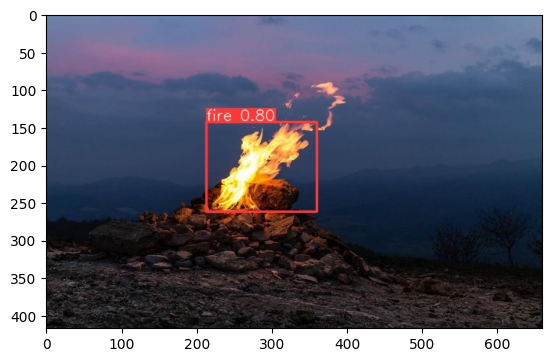

In [ ]:
# Load image data into Numpy arrays
img = np.asarray(Image.open('/content/runs/detect/predict/photo-2-1668750545066788917558.jpeg'))

# Plot the image
plt.imshow(img)
plt.show()

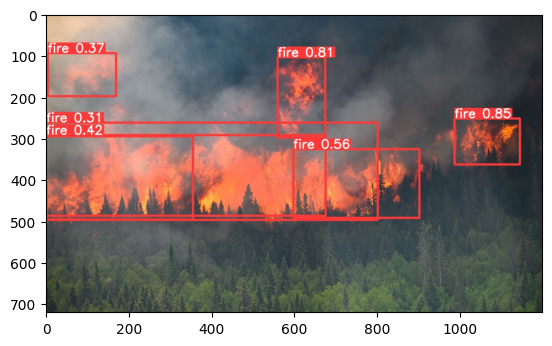

In [ ]:
# Load image data into Numpy arrays
img = np.asarray(Image.open('/content/runs/detect/predict/Chay-rung-set-8271-1698296238.jpg'))

# Plot the image
plt.imshow(img)
plt.show()

In [ ]:
src = '/content/runs/detect/predict'
dst = '/content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/trained_model_predict'
shutil.copytree(src, dst)

'/content/drive/MyDrive/CS114_Machine_learning/CS114_Do_an/trained_model_predict'